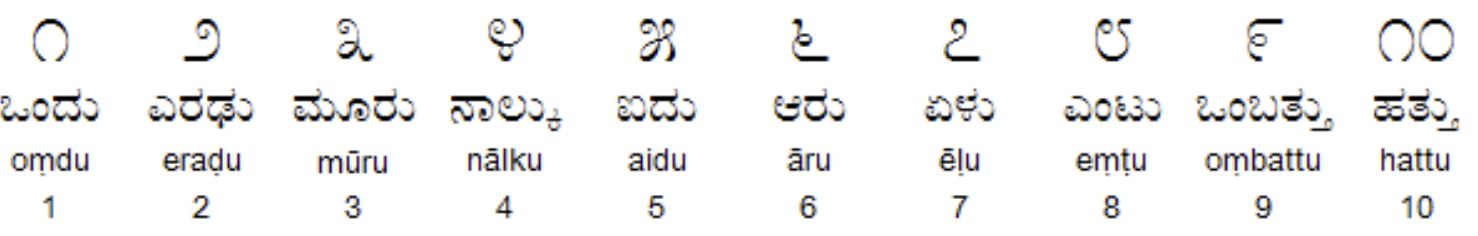

In [71]:
import cv2

from keras.models import load_model
from keras.preprocessing import image

from IPython.display import display as ipydisplay, Image, clear_output

import numpy as np
import matplotlib.pyplot as plt

# load the model we saved
model = load_model('model/model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Define class
classes = ['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'three', 'two', 'zero']

def predict(path):
    img = image.load_img(path, color_mode='grayscale')
    x = image.img_to_array(img)
    
    x = cv2.resize(x, (54, 54))
    x = np.expand_dims(x, axis=2)
    x = np.expand_dims(x, axis=0)

    # images = np.vstack([x])
    predi = model.predict_classes(x, batch_size=16)[0]
    
    plt.imshow(img)
    print ('Predicted class: ' + classes[predi])
    
clear_output()
    
ipydisplay(Image('kannada.png'))

Predicted class: zero


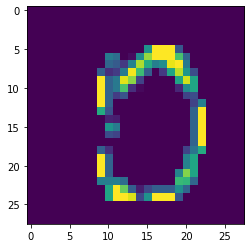

In [72]:
predict('validation_data/zero/zero_02511.png')

Predicted class: eight


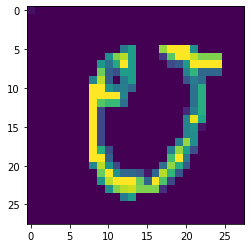

In [73]:
predict('validation_data/eight/eight_016189.png')

Predicted class: three


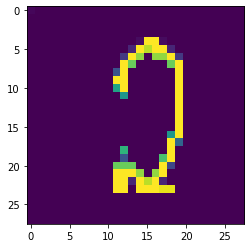

In [74]:
predict('train_data/three/three_09584.png')

Predicted class: three


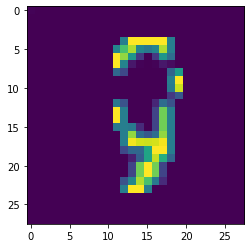

In [20]:
predict('train_data/two/two_02503.png')

# Image generator

In [23]:
import numpy as np
import csv
from PIL import Image    
import matplotlib.pyplot as plt

In [ ]:
counter = dict()

with open('test.csv') as csv_file:
    csv_reader = csv.reader(csv_file)

    # skip headers
    next(csv_reader)

    for row in csv_reader:

        pixels = row[:-1] # without label
        pixels = np.array(pixels, dtype='float')
        pixels = pixels.reshape((28, 28))

        label = row[-1]

        if label not in counter:
            counter[label] = 0
        counter[label] += 1

        filename = '{}{}.png'.format(label, counter[label])
        plt.imsave('test_data/' + filename, pixels)

        print('saved:', filename)

# Model building section

In [2]:
import sys # system functions (ie. exiting the program)
import os # operating system functions (ie. path building on Windows vs. MacOs)
import time # for time operations
import uuid # for generating unique file names
import math # math functions

from IPython.display import display as ipydisplay, Image, clear_output, HTML # for interacting with the notebook better

import numpy as np # matrix operations (ie. difference between two matricies)
import cv2 # (OpenCV) computer vision functions (ie. tracking)
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')
print('OpenCV Version: {}.{}.{}'.format(major_ver, minor_ver, subminor_ver))

import matplotlib.pyplot as plt # (optional) for plotting and showing images inline
%matplotlib inline

import keras # high level api to tensorflow (or theano, CNTK, etc.) and useful image preprocessing
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
print('Keras image data format: {}'.format(K.image_data_format()))

OpenCV Version: 4.1.1
Keras image data format: channels_last


In [19]:
batch_size = 16

training_datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(zoom_range=0.2, rotation_range=10)

training_generator = training_datagen.flow_from_directory(
    'train_data',
    target_size=(54, 54),
    batch_size=batch_size,
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    'validation_data',
    target_size=(54, 54),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(54, 54, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 52, 52, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 52, 52, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_32 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 64)        18496     
__________

In [21]:
model.fit_generator(
    generator=training_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=80,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=200 // batch_size,
    workers=8,
)

Epoch 1/80
125/125 [==============================] - 5s 43ms/step - loss: 3.9086 - acc: 0.1110 - val_loss: 2.2901 - val_acc: 0.1094
Epoch 2/80
125/125 [==============================] - 4s 33ms/step - loss: 2.2656 - acc: 0.1450 - val_loss: 2.0481 - val_acc: 0.3125
Epoch 3/80
125/125 [==============================] - 4s 32ms/step - loss: 2.1869 - acc: 0.1905 - val_loss: 1.7872 - val_acc: 0.3698
Epoch 4/80
125/125 [==============================] - 5s 37ms/step - loss: 2.0752 - acc: 0.2375 - val_loss: 1.6308 - val_acc: 0.4531
Epoch 5/80
125/125 [==============================] - 4s 34ms/step - loss: 2.0063 - acc: 0.2685 - val_loss: 1.5625 - val_acc: 0.5365
Epoch 6/80
125/125 [==============================] - 4s 31ms/step - loss: 1.9718 - acc: 0.2810 - val_loss: 1.2771 - val_acc: 0.5625
Epoch 7/80
125/125 [==============================] - 4s 33ms/step - loss: 1.8609 - acc: 0.3310 - val_loss: 1.2947 - val_acc: 0.6510
Epoch 8/80
125/125 [==============================] - 4s 33ms/step - 

Epoch 62/80
125/125 [==============================] - 4s 31ms/step - loss: 0.6725 - acc: 0.7660 - val_loss: 0.1838 - val_acc: 0.9375
Epoch 63/80
125/125 [==============================] - 4s 32ms/step - loss: 0.6912 - acc: 0.7730 - val_loss: 0.2384 - val_acc: 0.9219
Epoch 64/80
125/125 [==============================] - 4s 32ms/step - loss: 0.6739 - acc: 0.7670 - val_loss: 0.1351 - val_acc: 0.9792
Epoch 65/80
125/125 [==============================] - 4s 31ms/step - loss: 0.6663 - acc: 0.7620 - val_loss: 0.1504 - val_acc: 0.9688
Epoch 66/80
125/125 [==============================] - 4s 31ms/step - loss: 0.6571 - acc: 0.7765 - val_loss: 0.1658 - val_acc: 0.9583
Epoch 67/80
125/125 [==============================] - 4s 30ms/step - loss: 0.6454 - acc: 0.7820 - val_loss: 0.1632 - val_acc: 0.9740
Epoch 68/80
125/125 [==============================] - 4s 32ms/step - loss: 0.5957 - acc: 0.7940 - val_loss: 0.1350 - val_acc: 0.9635
Epoch 69/80
125/125 [==============================] - 4s 32ms

# Evaluation

In [48]:
from sklearn.metrics import classification_report

In [80]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'validation_data', # Put your path here
    target_size=(54, 54),
    batch_size=16,
    color_mode='grayscale',
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 10000 images belonging to 10 classes.


In [82]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

       eight       0.99      0.96      0.97      1000
        five       0.91      0.99      0.95      1000
        four       0.97      0.92      0.95      1000
        nine       0.98      0.97      0.97      1000
         one       0.95      1.00      0.98      1000
       seven       0.93      0.91      0.92      1000
         six       0.89      0.96      0.92      1000
       three       0.96      0.92      0.94      1000
         two       0.99      0.95      0.97      1000
        zero       0.96      0.96      0.96      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
model.save("model/newmodel.h5")